# Import the required libraries

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import sklearn

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('wine_quality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

# EDA

***Check for duplicates***

In [5]:
df=df.drop_duplicates()

In [6]:
df.shape

(1359, 12)

So there are duplicates which are being dropped,as the duplicates are not neccessary 

In [7]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

***Check for null values***

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

So there are no null values

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


As we can observe fro the table there are outliers and skewness in some of the columns like "residual sugar","free sulfur dioxide"..etc

In [10]:
df['quality'].value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

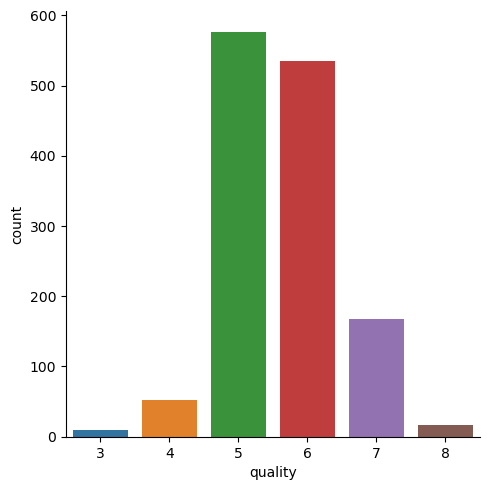

In [11]:
sns.catplot(data=df,x='quality',kind='count')

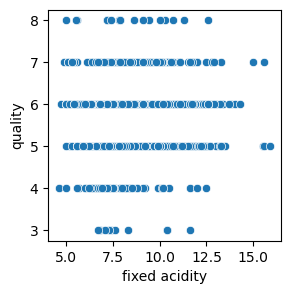

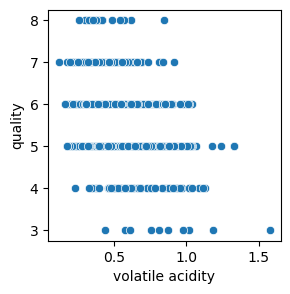

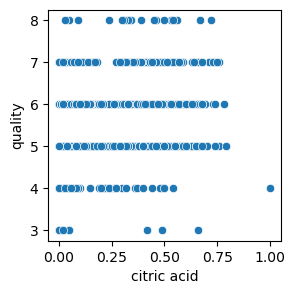

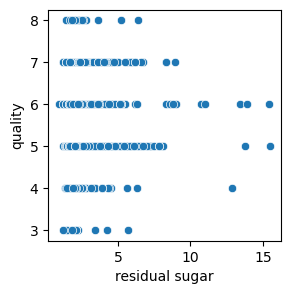

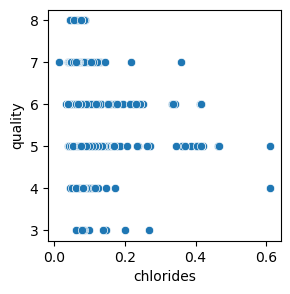

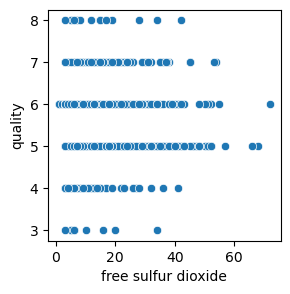

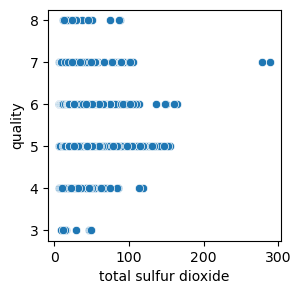

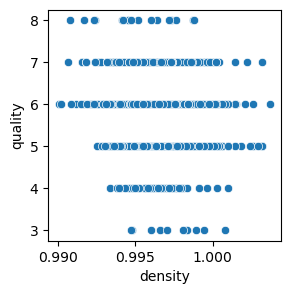

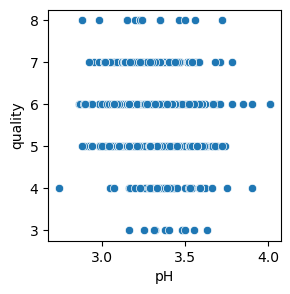

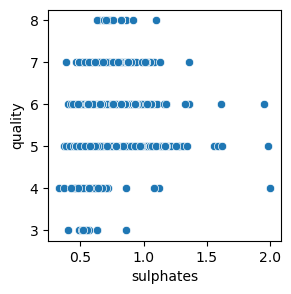

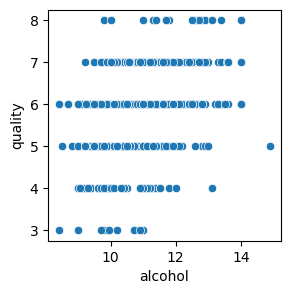

In [12]:
for i in df.drop('quality',axis=1):
    plt.figure(figsize=(3,3))
    sns.scatterplot(x=i,y='quality',data=df)
    plt.show()

We can see in some the features like alcohol and citric acis as alcohol content is more the quality increases

and as volatlie acidity decreases quality increases

So the above plot gives what features are directly proportional and indirectly proportional to quality

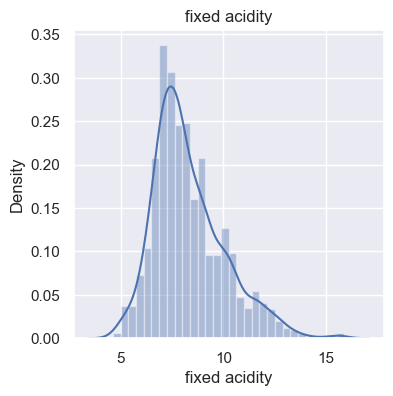

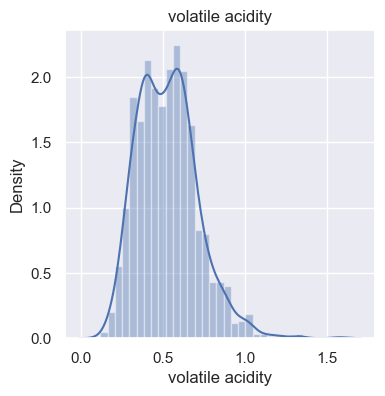

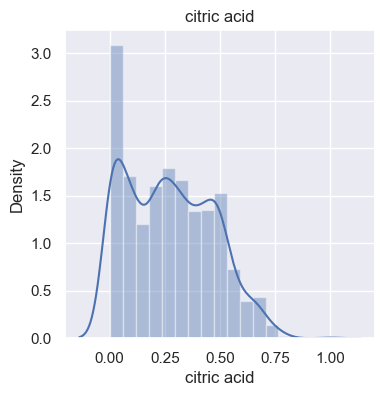

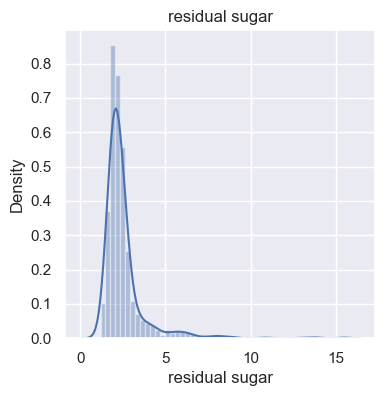

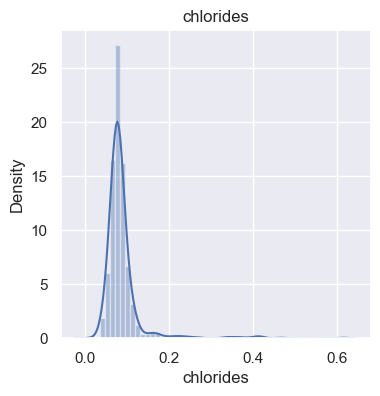

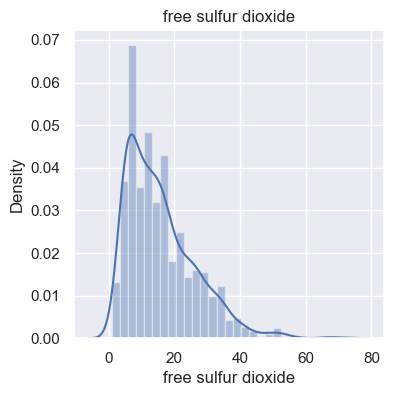

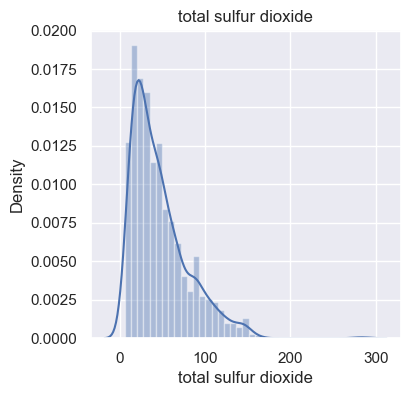

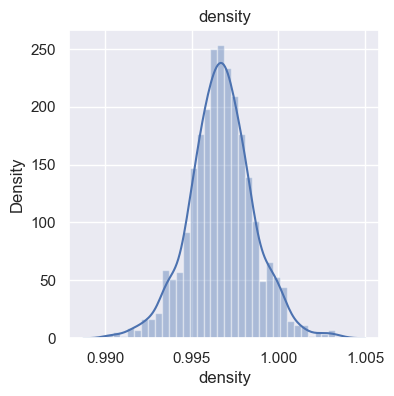

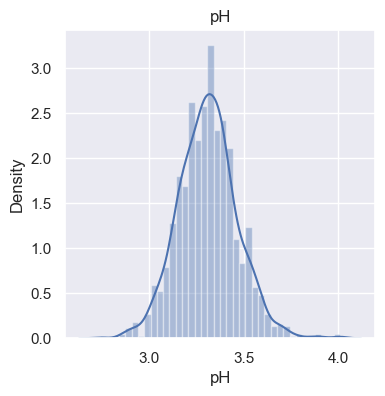

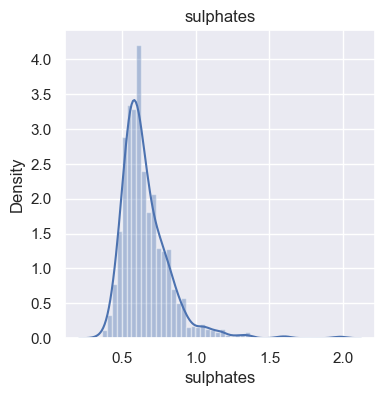

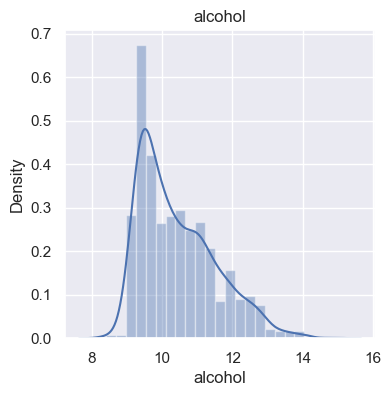

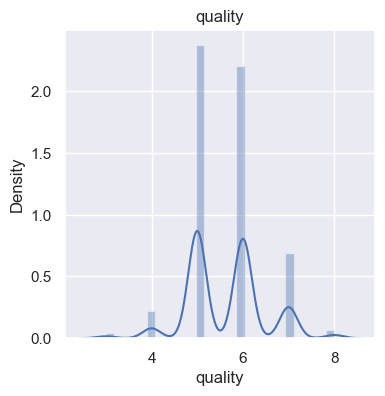

In [13]:
for i in df.columns:
    sns.set()#gives grids in background
    plt.figure(figsize=(4,4))
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

From the above distplot we can see that there is skewness in the columns

***Outliers***

So we will do capping for these outliers

find out for outliers

fixed acidity              Axes(0.125,0.712609;0.227941x0.167391)
volatile acidity        Axes(0.398529,0.712609;0.227941x0.167391)
citric acid             Axes(0.672059,0.712609;0.227941x0.167391)
residual sugar             Axes(0.125,0.511739;0.227941x0.167391)
chlorides               Axes(0.398529,0.511739;0.227941x0.167391)
free sulfur dioxide     Axes(0.672059,0.511739;0.227941x0.167391)
total sulfur dioxide        Axes(0.125,0.31087;0.227941x0.167391)
density                  Axes(0.398529,0.31087;0.227941x0.167391)
pH                       Axes(0.672059,0.31087;0.227941x0.167391)
sulphates                      Axes(0.125,0.11;0.227941x0.167391)
alcohol                     Axes(0.398529,0.11;0.227941x0.167391)
quality                     Axes(0.672059,0.11;0.227941x0.167391)
dtype: object

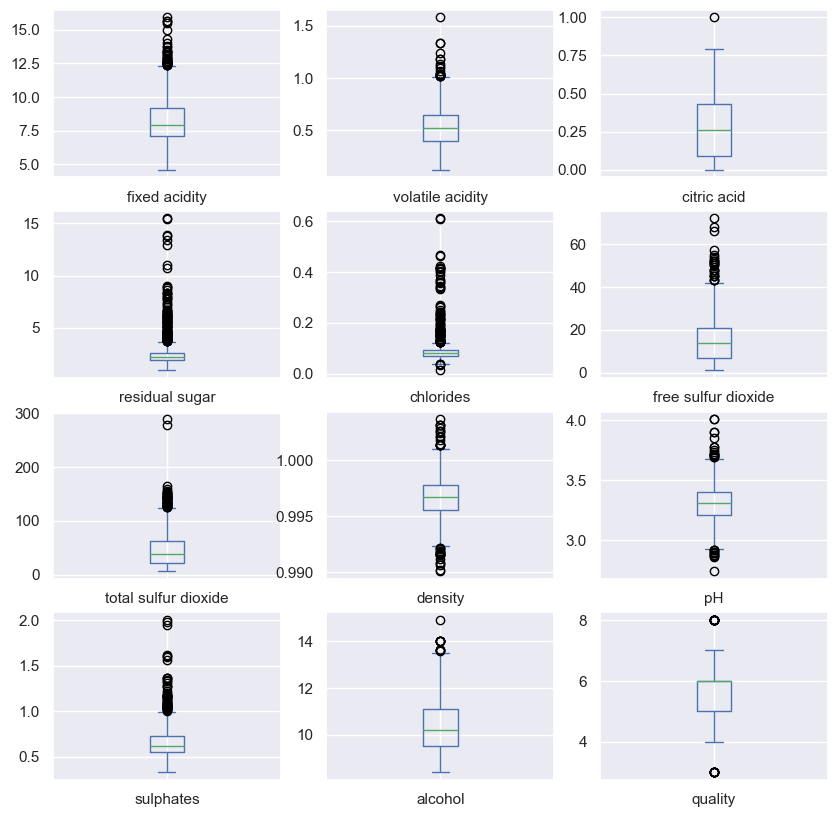

In [14]:
df.plot(kind='box',subplots=True,layout=(4,3),figsize=(10,10))

Outliers removal

In [15]:
for i in df.drop('quality',axis=1).columns:
    IQR=df[i].quantile(0.75)-df[i].quantile(0.25)

    Q1=df[i].quantile(0.25)

    Q2=df[i].quantile(0.75)

    lowl=Q1-1.5*IQR
    print(lowl)
    upperl=Q2+1.5*IQR
    print(upperl)
    
    new_df=df[i].copy()
    
    new_df=np.where(new_df > upperl , upperl ,
                           np.where(new_df <lowl, lowl ,new_df
                                   )
                           )
    df[i]=new_df

3.95
12.349999999999998
0.015000000000000013
1.0150000000000001
-0.42000000000000004
0.94
0.8499999999999996
3.6500000000000004
0.03850000000000002
0.12249999999999998
-14.0
42.0
-39.5
124.5
0.99227
1.00115
2.925
3.6849999999999996
0.28000000000000014
0.9999999999999999
7.1000000000000005
13.5


fixed acidity              Axes(0.125,0.712609;0.227941x0.167391)
volatile acidity        Axes(0.398529,0.712609;0.227941x0.167391)
citric acid             Axes(0.672059,0.712609;0.227941x0.167391)
residual sugar             Axes(0.125,0.511739;0.227941x0.167391)
chlorides               Axes(0.398529,0.511739;0.227941x0.167391)
free sulfur dioxide     Axes(0.672059,0.511739;0.227941x0.167391)
total sulfur dioxide        Axes(0.125,0.31087;0.227941x0.167391)
density                  Axes(0.398529,0.31087;0.227941x0.167391)
pH                       Axes(0.672059,0.31087;0.227941x0.167391)
sulphates                      Axes(0.125,0.11;0.227941x0.167391)
alcohol                     Axes(0.398529,0.11;0.227941x0.167391)
quality                     Axes(0.672059,0.11;0.227941x0.167391)
dtype: object

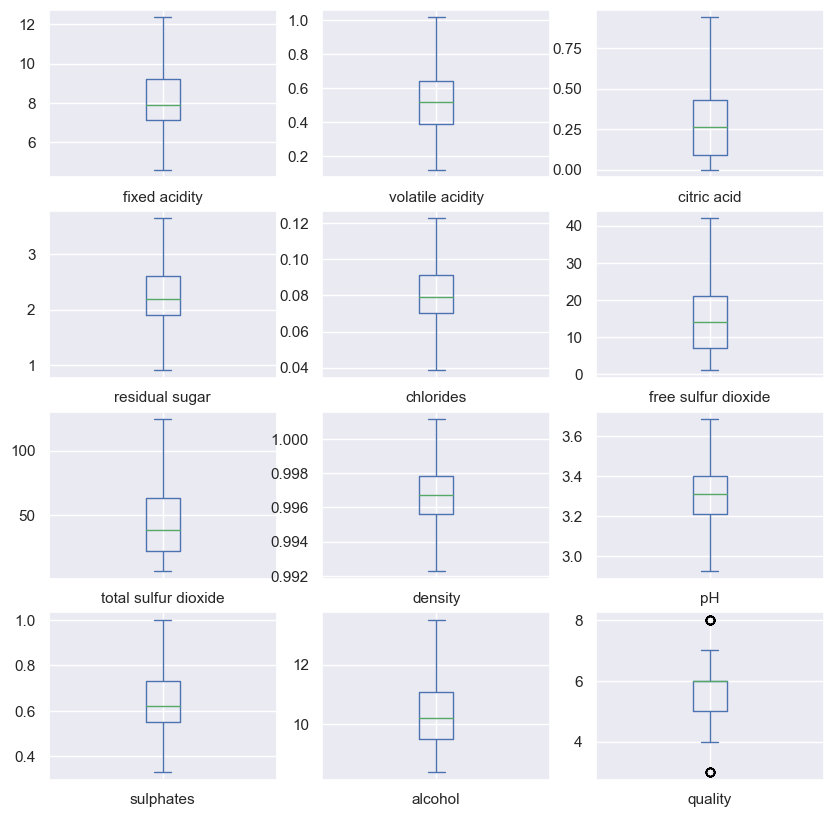

In [16]:
df.plot(kind='box',subplots=True,layout=(4,3),figsize=(10,10))

All the outliers are being removed

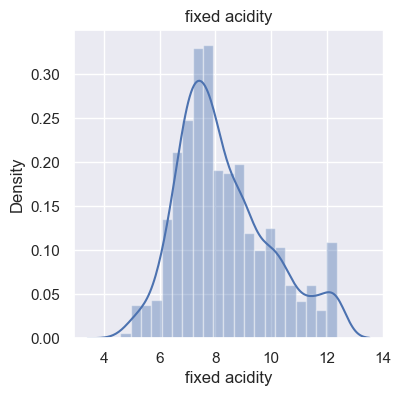

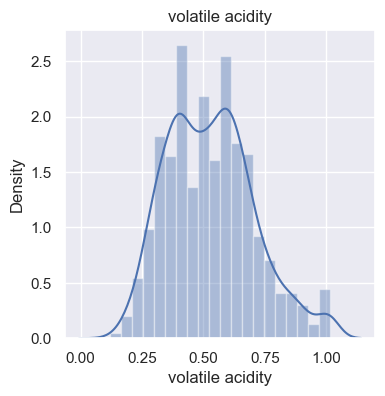

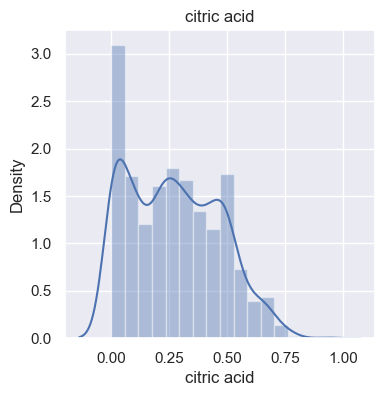

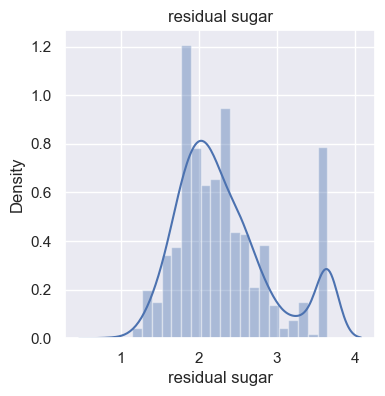

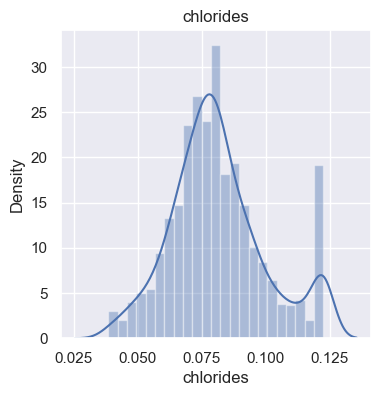

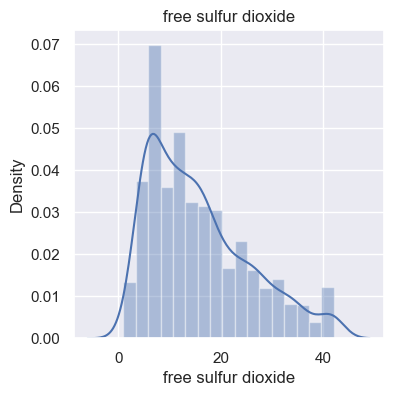

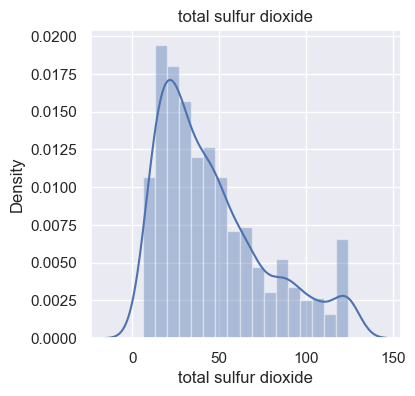

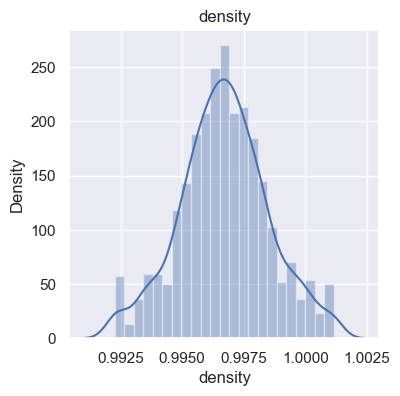

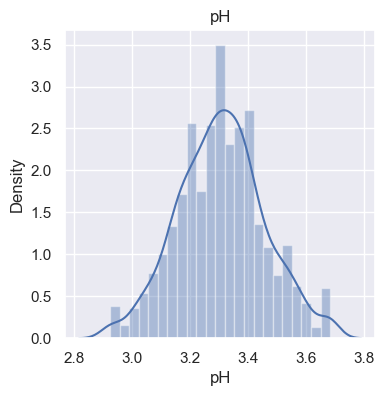

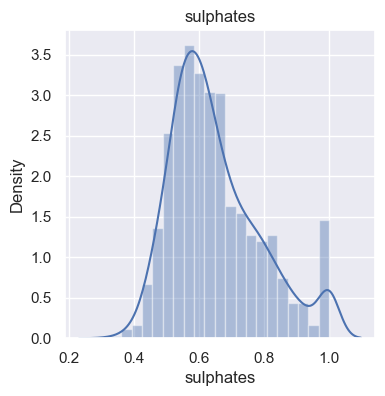

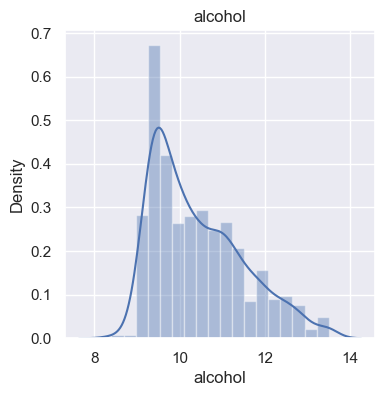

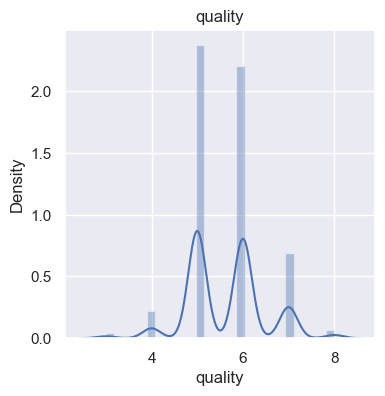

In [17]:
for i in df.columns:
    sns.set()#gives grids in background
    plt.figure(figsize=(4,4))
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

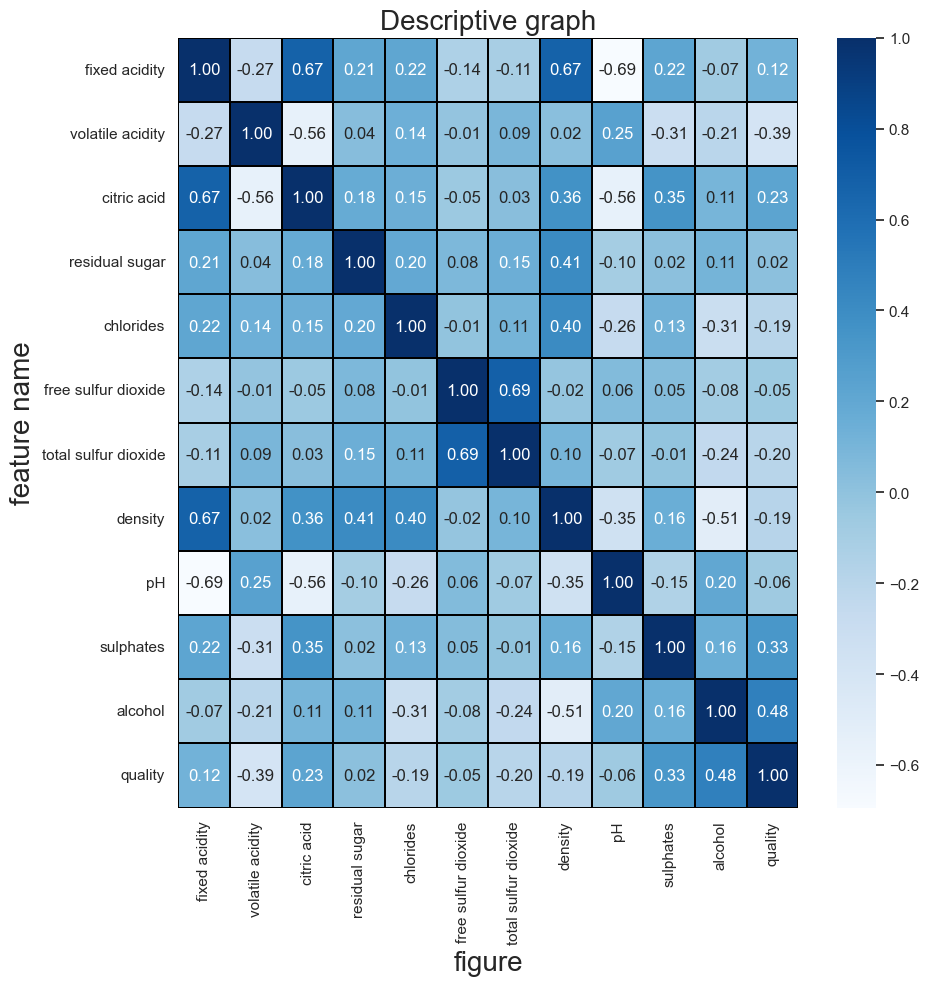

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Blues')
plt.xlabel('figure',fontsize=20)
plt.ylabel('feature name',fontsize=20)
plt.title('Descriptive graph',fontsize=20)
plt.show()

In [19]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [20]:
x=df.drop(['quality','fixed acidity'],axis=1)

In [21]:
corr_features=correlation(x,0.65)

In [22]:
print(corr_features)

{'total sulfur dioxide'}


In [23]:
df_new=df.drop(['fixed acidity','total sulfur dioxide'],axis=1)

In [24]:
df_new.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5
1,0.88,0.00,2.6,0.098,25.0,0.9968,3.20,0.68,9.8,5
2,0.76,0.04,2.3,0.092,15.0,0.9970,3.26,0.65,9.8,5
3,0.28,0.56,1.9,0.075,17.0,0.9980,3.16,0.58,9.8,6
5,0.66,0.00,1.8,0.075,13.0,0.9978,3.51,0.56,9.4,5


Now label Binarization of the quality is done which is the Target Variable

In [25]:
y=df_new['quality'].apply(lambda y_value:1 if y_value>=7 else 0)

In [26]:
df_new['quality']=y

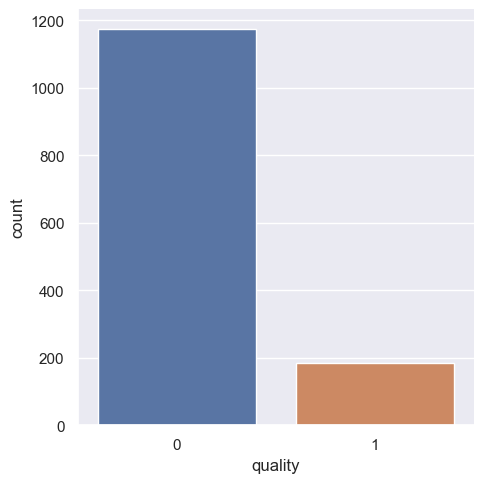

In [27]:
sns.catplot(data=df_new,x='quality',kind='count')

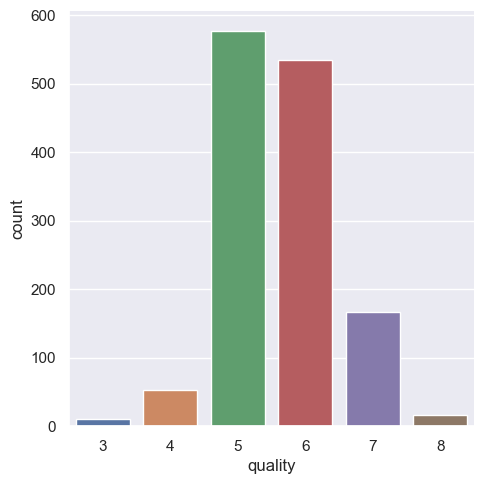

In [28]:
sns.catplot(data=df,x='quality',kind='count')

splitting data into two variables

In [29]:
x=df_new.drop('quality',axis=1)
y=df_new['quality']

In [30]:
x

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
0,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4
1,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8
2,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8
3,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8
5,0.660,0.00,1.8,0.075,13.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...
1593,0.620,0.08,1.9,0.068,28.0,0.99651,3.42,0.82,9.5
1594,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5
1595,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2
1597,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2


In [31]:
y

0       0
1       0
2       0
3       0
5       0
       ..
1593    0
1594    0
1595    0
1597    0
1598    0
Name: quality, Length: 1359, dtype: int64

In [32]:
import imblearn

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
sm=SMOTE()

In [35]:
x,y=sm.fit_resample(x,y)

In [36]:
y.value_counts()

quality
0    1175
1    1175
Name: count, dtype: int64

In [37]:
x.value_counts

<bound method DataFrame.value_counts of       volatile acidity  citric acid  residual sugar  chlorides  \
0             0.700000     0.000000        1.900000   0.076000   
1             0.880000     0.000000        2.600000   0.098000   
2             0.760000     0.040000        2.300000   0.092000   
3             0.280000     0.560000        1.900000   0.075000   
4             0.660000     0.000000        1.800000   0.075000   
...                ...          ...             ...        ...   
2345          0.513956     0.155266        1.644748   0.065184   
2346          0.308286     0.615714        2.641429   0.098729   
2347          0.392133     0.660000        2.996444   0.094636   
2348          0.308199     0.489255        3.650000   0.088658   
2349          0.340512     0.335078        2.033851   0.075559   

      free sulfur dioxide   density        pH  sulphates    alcohol  
0               11.000000  0.997800  3.510000   0.560000   9.400000  
1               25.000000  

Scaling the features

In [38]:
scaler=StandardScaler()
X=scaler.fit_transform(x)
X

array([[ 1.35282691, -1.65449826, -0.74154733, ...,  1.46896583,
        -0.97856178, -1.30905867],
       [ 2.43452128, -1.65449826,  0.40426168, ..., -0.72282666,
        -0.06643684, -0.96039816],
       [ 1.7133917 , -1.44323041, -0.08679932, ..., -0.29860875,
        -0.29446808, -0.96039816],
       ...,
       [-0.49727021,  1.83142136,  1.0531893 , ..., -0.83406393,
        -0.3816222 , -0.03295735],
       [-1.00166724,  0.92959619,  2.12297519, ..., -0.19101621,
        -0.28549549,  1.05089673],
       [-0.80748251,  0.11528015, -0.52245065, ..., -0.24711849,
         0.29296026,  0.80794415]])

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV

Finding best random state for building our classification models

In [40]:
lr=LogisticRegression()
maxAcc=0
rs=0
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    ac=accuracy_score(y_test,pred)
    if ac>maxAcc:
        maxAcc=ac
        rs=i
        
print("Best score ",maxAcc)
print("random state ",rs)

Best score  0.8605442176870748
random state  196


In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=361)

In [42]:
print("size of x_train : ",x_train.shape)
print("size of x_test : ",x_test.shape)
print("size of y_train : ",y_train.shape)
print("size of y_test : ",y_test.shape)

size of x_train :  (1762, 9)
size of x_test :  (588, 9)
size of y_train :  (1762,)
size of y_test :  (588,)


Checking which model gives better results

In [43]:
def classify(clf,X,y):
        x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=361)
        
        #train the model
        clf.fit(x_train,y_train)
        
        #predicting Ytest
        pred=clf.predict(x_test)
        
        #accuracy score
        acc_score=accuracy_score(y_test,pred)
        print("Accuracy score",acc_score)
        
        #confusion matrix
        print("Confusion matrix :\n",confusion_matrix(y_test,pred))
        
        #classification report
        print("Classification report :\n",classification_report(y_test,pred))
        
        #cross validation score
        cv_score=(cross_val_score(clf,x,y,cv=5).mean())
        print("cross validation score ",cv_score)
        
        #Result of accuracy minus cv scores
        result=acc_score-cv_score
        print("The final result of accuracy minus cross validation is ",result)

LOGISTIC REGRESSION

In [44]:
clf=LogisticRegression()
classify(clf,X,y)

Accuracy score 0.826530612244898
Confusion matrix :
 [[233  69]
 [ 33 253]]
Classification report :
               precision    recall  f1-score   support

           0       0.88      0.77      0.82       302
           1       0.79      0.88      0.83       286

    accuracy                           0.83       588
   macro avg       0.83      0.83      0.83       588
weighted avg       0.83      0.83      0.83       588

cross validation score  0.8038297872340425
The final result of accuracy minus cross validation is  0.022700825010855463


DesicionTreeClassifier

In [45]:
clf=DecisionTreeClassifier()
classify(clf,X,y)

Accuracy score 0.8673469387755102
Confusion matrix :
 [[256  46]
 [ 32 254]]
Classification report :
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       302
           1       0.85      0.89      0.87       286

    accuracy                           0.87       588
   macro avg       0.87      0.87      0.87       588
weighted avg       0.87      0.87      0.87       588

cross validation score  0.8446808510638297
The final result of accuracy minus cross validation is  0.022666087711680438


Random forest classifier

In [46]:
clf=RandomForestClassifier()
classify(clf,X,y)

Accuracy score 0.9047619047619048
Confusion matrix :
 [[261  41]
 [ 15 271]]
Classification report :
               precision    recall  f1-score   support

           0       0.95      0.86      0.90       302
           1       0.87      0.95      0.91       286

    accuracy                           0.90       588
   macro avg       0.91      0.91      0.90       588
weighted avg       0.91      0.90      0.90       588

cross validation score  0.8944680851063829
The final result of accuracy minus cross validation is  0.010293819655521896


AdaBoost classifier

In [47]:
clf=AdaBoostClassifier()
classify(clf,X,y)

Accuracy score 0.8673469387755102
Confusion matrix :
 [[249  53]
 [ 25 261]]
Classification report :
               precision    recall  f1-score   support

           0       0.91      0.82      0.86       302
           1       0.83      0.91      0.87       286

    accuracy                           0.87       588
   macro avg       0.87      0.87      0.87       588
weighted avg       0.87      0.87      0.87       588

cross validation score  0.8387234042553192
The final result of accuracy minus cross validation is  0.028623534520190952


Gradient Boosting classifer

In [48]:
clf=GradientBoostingClassifier()
classify(clf,X,y)

Accuracy score 0.8928571428571429
Confusion matrix :
 [[260  42]
 [ 21 265]]
Classification report :
               precision    recall  f1-score   support

           0       0.93      0.86      0.89       302
           1       0.86      0.93      0.89       286

    accuracy                           0.89       588
   macro avg       0.89      0.89      0.89       588
weighted avg       0.90      0.89      0.89       588

cross validation score  0.8625531914893617
The final result of accuracy minus cross validation is  0.03030395136778119


SVC classifier

In [49]:
clf=SVC()
classify(clf,X,y)

Accuracy score 0.8792517006802721
Confusion matrix :
 [[251  51]
 [ 20 266]]
Classification report :
               precision    recall  f1-score   support

           0       0.93      0.83      0.88       302
           1       0.84      0.93      0.88       286

    accuracy                           0.88       588
   macro avg       0.88      0.88      0.88       588
weighted avg       0.88      0.88      0.88       588

cross validation score  0.7765957446808511
The final result of accuracy minus cross validation is  0.10265595599942101


Kneighbour classifier

In [50]:
clf=KNeighborsClassifier()
classify(clf,X,y)

Accuracy score 0.8605442176870748
Confusion matrix :
 [[224  78]
 [  4 282]]
Classification report :
               precision    recall  f1-score   support

           0       0.98      0.74      0.85       302
           1       0.78      0.99      0.87       286

    accuracy                           0.86       588
   macro avg       0.88      0.86      0.86       588
weighted avg       0.89      0.86      0.86       588

cross validation score  0.8434042553191489
The final result of accuracy minus cross validation is  0.01713996236792592


From the above we can see random forest classifer givng best precision and differnec between accc and cv is low we select Random forest classifier

In [51]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc_score=accuracy_score(y_test,pred)
print("Accuracy score",acc_score)
#confusion matrix
print("Confusion matrix :\n",confusion_matrix(y_test,pred))
#classification report
print("Classification report :\n",classification_report(y_test,pred))
        

Accuracy score 0.9081632653061225
Confusion matrix :
 [[266  36]
 [ 18 268]]
Classification report :
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       302
           1       0.88      0.94      0.91       286

    accuracy                           0.91       588
   macro avg       0.91      0.91      0.91       588
weighted avg       0.91      0.91      0.91       588



Hyperparameter tuning on random forest classifier

In [53]:
from sklearn.model_selection import GridSearchCV

par={'n_estimators':range(100,500,100),'criterion':['gini','entropy'],'max_depth':range(0,10,5),'min_samples_split':range(2,10),'min_samples_leaf':range(1,5),'max_features':['auto']}

In [54]:
grid=GridSearchCV(RandomForestClassifier(),param_grid=par,verbose=2,n_jobs=1)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time

ValueError: 
All the 2560 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1280 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DIVITH RAJ\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DIVITH RAJ\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\DIVITH RAJ\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\DIVITH RAJ\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_depth' parameter of RandomForestClassifier must be an int in the range [1, inf) or None. Got 0 instead.

--------------------------------------------------------------------------------
1280 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DIVITH RAJ\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DIVITH RAJ\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\DIVITH RAJ\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\DIVITH RAJ\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


AUC ROC curve

In [62]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

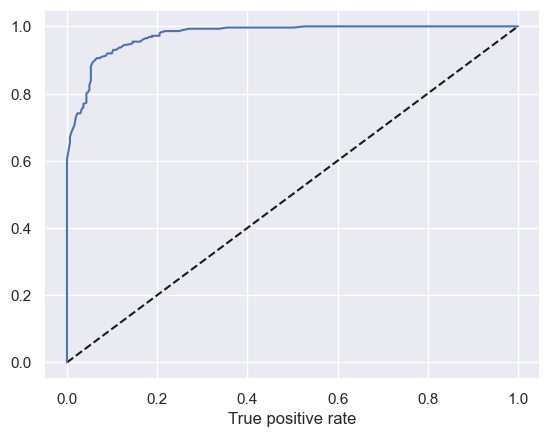

Score 0.9089288195248462


In [63]:
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.xlabel('True positive rate')
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(x_test))
print("Score",auc_score)

Saving the model

In [65]:
import pickle

In [66]:
filename='wine_quality.pkl'
pickle.dump(rf,open(filename,'wb'))


In [69]:
#loaded model

loaded_model=pickle.load(open('wine_quality.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

90.81632653061224


In [79]:
#conclusion

conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,578,579,580,581,582,583,584,585,586,587
Predicted,0,0,1,1,0,1,0,1,1,0,...,1,1,0,1,0,1,0,0,0,1
Original,0,0,1,1,0,1,0,1,1,0,...,1,1,0,1,0,1,0,0,0,1
